<a href="https://www.kaggle.com/code/hknaralasetty/decision-tree-89-accuracy?scriptVersionId=98997695" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/kaggle/input/social-network-ads/Social_Network_Ads.csv'
data = pd.read_csv(path)
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
30,15581198,Male,31,74000,0
235,15646227,Male,46,79000,1
128,15722758,Male,30,17000,0
32,15573452,Female,21,16000,0
264,15600379,Male,48,90000,1


In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# One Hot Encoding 
isMale = pd.get_dummies(data.Gender)
data['Gender'] = isMale['Male']
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
349,15721835,1,38,61000,0
327,15785170,0,42,75000,0
10,15570769,0,26,80000,0
20,15649487,1,45,22000,1
322,15674331,1,41,52000,0


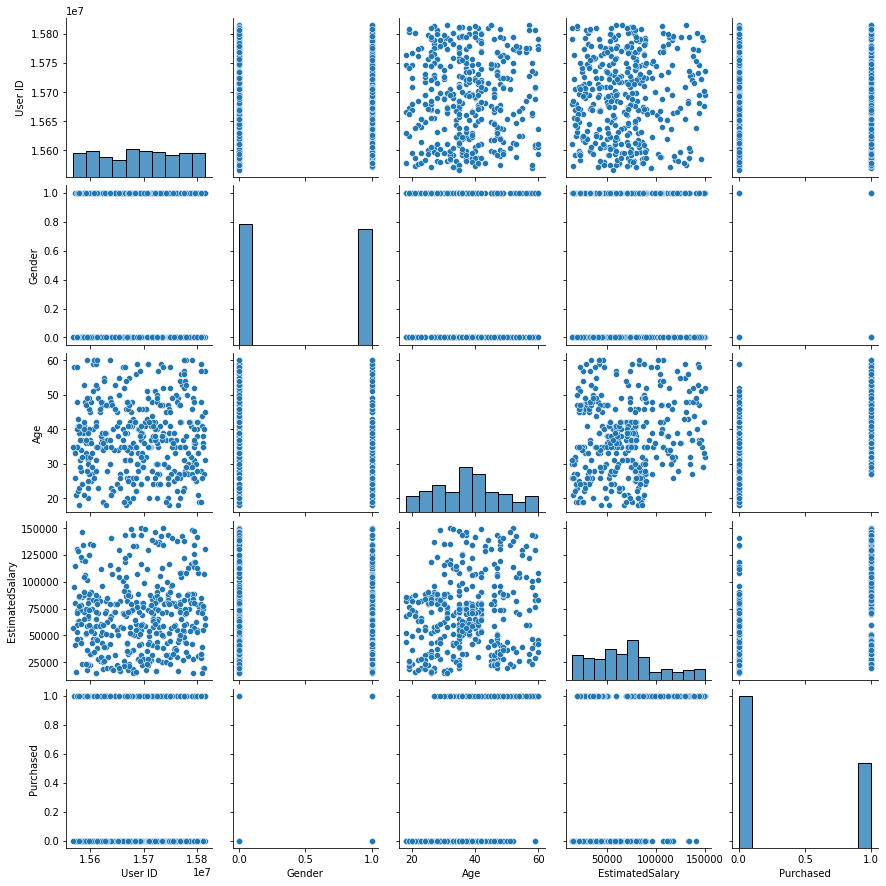

In [6]:
sns.pairplot(data)

In [7]:
X, y = data.drop(['User ID', 'Purchased'], axis = 1), data['Purchased']

In [8]:
from sklearn.model_selection import train_test_split as splitdata
X_train, X_test, y_train, y_test = splitdata(X, y, test_size = .2, random_state = 62)

In [9]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.8875